#Installing libraries

In [19]:
import torch # pytorch for tensor
import torch.nn as nn # to define the layers of the artificial neural network
import torch.optim as optim # module containing optimization algorithms
import torchvision # includes image processing and pre-defined models
import torchvision.transforms as transforms # performing image transformations
import matplotlib.pyplot as plt # visualization

#Device control

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Dataset loading, dataloading

In [21]:
def get_data_loaders(batch_size = 64): # the amount of data to be processed in each iteration.

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    # Download the dataset and create clusters
    train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Create data loader
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

#train_loader, test_loader = get_data_loaders()

#Data visualization

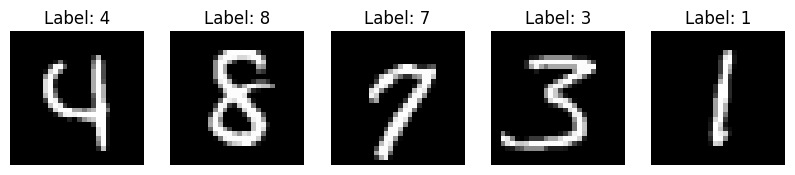

In [22]:
def visualize_samples(loader, n):
  images, labels = next(iter(loader)) # Gets images and labels from the first batch
  fig, axes = plt.subplots(1, n, figsize=(10, 5)) # visualization area for n different images
  for i in range(n):
    axes[i].imshow(images[i].squeeze(), cmap='gray') # display image in grayscale

    axes[i].set_title(f"Label: {labels[i].item()}") # write the class labels of the image as a title

    axes[i].axis('off') # hide axes
  plt.show()


#visualize_samples(train_loader, 5)

# Artificial neural network class

In [23]:
class NeuralNetwork(nn.Module): # pytorch inherits from nn.module class

    def __init__(self):
        super(NeuralNetwork, self).__init__() # nn Identify the components needed to build

        self.flatten = nn.Flatten() # Let's convert the images we have (2d) into vectors (1d)

        self.fc1 = nn.Linear(28*28, 128) # Create the first fully connected layer. input-size = 784, output-size = 128.

        self.relu = nn.ReLU() # create activation function

        self.fc2 = nn.Linear(128, 64) # Create the second fully connected layer. input-size = 128, output-size = 64.

        self.fc3 = nn.Linear(64, 10) # Create output layer. input-size = 64, output-size = 10.


    def forward(self, x): # forward propagation: take x = image as input

        x = self.flatten(x) # initial x = 28*28 image -> flatten it into 784 vectors
        x = self.fc1(x) # first connected layer
        x = self.relu(x) # activation function
        x = self.fc2(x) # second connected layer
        x = self.relu(x) # activation function
        x = self.fc3(x) # output layer

        return x # Let's return the output of our model

# create model and compile
#model = NeuralNetwork().to(device)

# Determine the loss function and optimization algorithm
define_loss_and_optimizer = lambda model:(
    nn.CrossEntropyLoss(), # multi-class classification problems loss function
    optim.Adam(model.parameters(), lr = 0.001) # update weinghts with adam
)

#criterion, optimizer = define_loss_and_optimizer(model)

#Train

Epoch 1/5, Loss: 0.3888
Epoch 2/5, Loss: 0.1846
Epoch 3/5, Loss: 0.1359
Epoch 4/5, Loss: 0.1100
Epoch 5/5, Loss: 0.0919


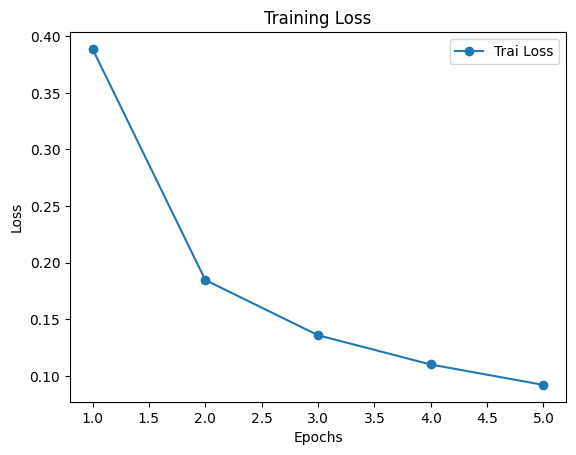

In [24]:
def train_model(model, train_loader, criterion, optimizer, epochs = 10):

    model.train() # Let's put the model in training mode
    train_losses = [] # a list to store the loss values obtained from each epoch

    for epoch in range(epochs): # Let's train for the specified number of epochs.
        total_loss = 0 # total loss value

        for images, labels in train_loader: # perform iteration on all training data
            images, labels = images.to(device), labels.to(device) # move data to the device

            optimizer.zero_grad() # reset gradients
            predictions = model(images) # apply model, forward pro.
            loss = criterion(predictions, labels) # loss calculation -> y_prediction with y_real
            loss.backward() # backpropagation, i.e. gradient calculation
            optimizer.step() # update weights

            total_loss = total_loss + loss.item()

        avg_loss = total_loss / len(train_loader) # average loss resulting from each epoch
        train_losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    #loss graph
    plt.figure()
    plt.plot(range(1, epochs+1), train_losses, marker = "o", linestyle = "-", label='Trai Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title("Training Loss")
    plt.legend()
    plt.show()

#train_model(model, train_loader, criterion, optimizer, epochs=5)




#Test

In [26]:
def test_model(model, test_loader):
    model.eval() # Let's put the model in test mode
    correct = 0 # correct guess counter
    total = 0 # total data counter

    with torch.no_grad(): # We disabled the gradient calculation because it was unnecessary.
        for images, labels in test_loader: # perform iteration on all test data
            images, labels = images.to(device), labels.to(device) # move data to the device
            predictions = model(images)
            _, predicted = torch.max(predictions, 1) # finding the label of the highest probability class
            total += labels.size(0) # increasing the total number of data
            correct += (predicted == labels).sum().item() # increase the number of correct predictions

    accuracy = 100 * correct / total # calculate accuracy rate
    print(f"Test Accuracy: {accuracy:.2f}%")

#test_model(model, test_loader)

Test Accuracy: 96.71%


#Main

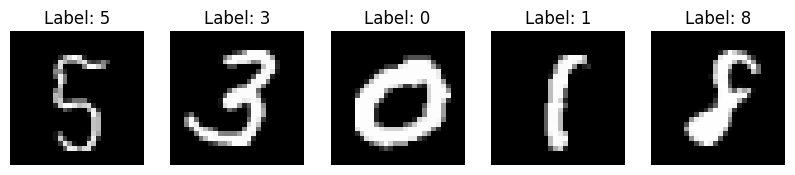

Epoch 1/10, Loss: 0.4084
Epoch 2/10, Loss: 0.1920
Epoch 3/10, Loss: 0.1383
Epoch 4/10, Loss: 0.1136
Epoch 5/10, Loss: 0.0969
Epoch 6/10, Loss: 0.0854
Epoch 7/10, Loss: 0.0768
Epoch 8/10, Loss: 0.0701
Epoch 9/10, Loss: 0.0597
Epoch 10/10, Loss: 0.0582


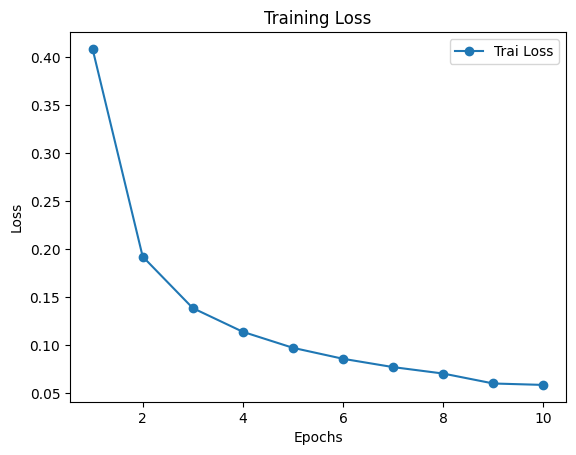

Test Accuracy: 96.89%


In [27]:
if __name__ == "__main__":
    train_loader, test_loader = get_data_loaders()
    visualize_samples(train_loader, 5)
    model = NeuralNetwork().to(device)
    criterion, optimizer = define_loss_and_optimizer(model)
    train_model(model, train_loader, criterion, optimizer)
    test_model(model, test_loader)